# <ins>Tutorial 3.1: More Plotting - Line, Scatter, Errorbar & Histogram</ins>
*ASTR 211: Observational Astronomy, Spring 2021* \
*Written by Mason V. Tea*

There are a ton of cool things you can do with plots, and I definitely can't cover them all here. There are also quite a few tips and tricks that, if I'm honest, you're better off leaving alone until you really need them, in which case there's probably a StackOverflow thread telling you how to do it. We'll cover all that you need to know (and a bit more) here.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

***
## Basics (review)

We went over the basics of plotting in the last tutorial, but let's revisit them quickly here. First, we'll need some data to plot, so I'll generate some parabolae:

In [2]:
x = np.linspace(-10000,10000,100)
y1 = x**2
y2 = 2*x**2
y3 = 3*x**2

Now, let's plot it. We want to be sure to include **axis labels** (_with units_ should they have any), an informative **title**, and a **legend** if you're plotting more than one function. You should also either **save and/or show** your plot, and **close** it when you're done.

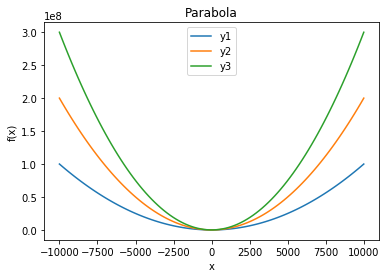

In [3]:
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.savefig('example.pdf')
plt.show()
plt.close()

Notice that, because the y-axis values are so large, `matplotlib` has reported them as single-digit numbers with an exponent (1E8) at the top of the axis.

This process is pretty straightforward and totally copy-paste-able. You're going to type something exactly like the code block above every time you make a basic plot, no matter if its a line plot, scatter plot, or histogram.

***
## Line plots

The examples I'm showing in this section are all line plots, but you can use most of these methods for any type of plot (where applicable).

### Line colors

First, you might be wondering if your plots have to use the not-so-exciting color palette in the plot above, and thankfully the answer is no. This is the default color scheme of `matplotlib`, and you can specify the colors of lines when you plot them. If I wanted red, purple, and pink lines, for example, I could add `c='<color>'` as an argument in the `plot()` function:

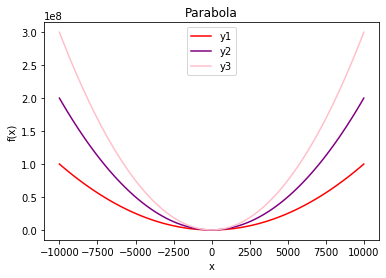

In [4]:
plt.plot(x, y1, label='y1', c='red')     
plt.plot(x, y2, label='y2', c='purple') 
plt.plot(x, y3, label='y3', c='pink')    
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

There are a ton of different colors to choose from outside of colors with normal names like 'blue' or 'red', etc. You can enter in a hex code in place of the color name if you have a specific color in mind, or you can try [one of `matplotlib`'s many other named colors](https://matplotlib.org/stable/gallery/color/named_colors.html). Personally, I usually like to use _firebrick, royalblue, goldenrod,_ and _forestgreen_ for my research plots:

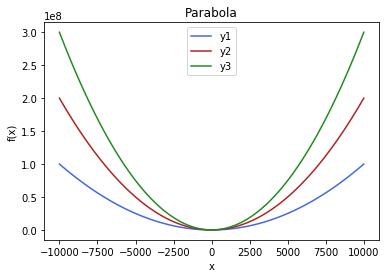

In [5]:
plt.plot(x, y1, label='y1', c='royalblue')   
plt.plot(x, y2, label='y2', c='firebrick')   
plt.plot(x, y3, label='y3', c='forestgreen')  
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

### Linestyle

While we're talking about lines, you should know that you can also change their _style_ to something like dotted or dashed. This is just another argument in the `plot()` function, with syntax `linestyle='<style>'`. [There are lots of different styles to choose from](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html), but the main ones other than solid are _dotted, dashed,_ and _dashdot._ You can also change the thickness of the line with `linewidth`.

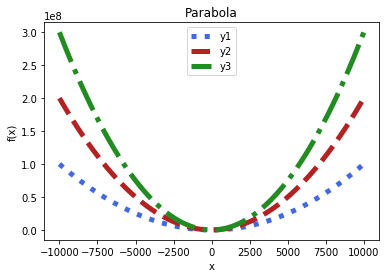

In [6]:
plt.plot(x, y1, label='y1', c='royalblue', linestyle='dotted', linewidth=5)        
plt.plot(x, y2, label='y2', c='firebrick', linestyle='dashed', linewidth=5)        
plt.plot(x, y3, label='y3', c='forestgreen', linestyle='dashdot', linewidth=5)     
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

### Scaling

In a lot of fields, and in astronomy especially, logarithmic plots are ubiquitous. In order to change these linear axes to a log scale, we just need to add `plt.xscale('log')` and/or `plt.yscale('log')`, depending on which/how many axes you want changed. Let's do both.

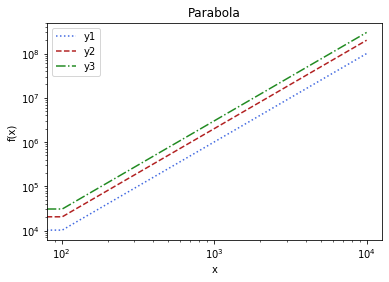

In [7]:
plt.plot(x, y1, label='y1', c='royalblue', linestyle='dotted')        
plt.plot(x, y2, label='y2', c='firebrick', linestyle='dashed')        
plt.plot(x, y3, label='y3', c='forestgreen', linestyle='dashdot') 

plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()
plt.close()

Weird. Now suppose we only want to get rid of that weird horizontal piece of these functions on the left of the plot, and the blank space to the right. We can tell `matplotlib` which parts of a certain axis to include in the plot with `plt.xlim(<min>,<max>)` and/or `plt.ylim(<min>,<max>)`.

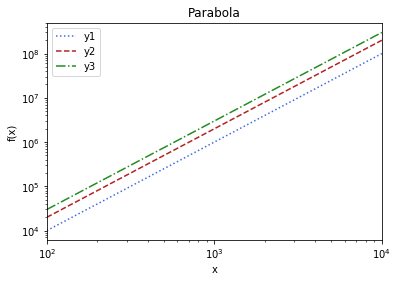

In [8]:
plt.plot(x, y1, label='y1', c='royalblue', linestyle='dotted')        
plt.plot(x, y2, label='y2', c='firebrick', linestyle='dashed')        
plt.plot(x, y3, label='y3', c='forestgreen', linestyle='dashdot') 

plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(100,10000)

plt.legend()

plt.show()
plt.close()

Notice, too, that the legend moved itself to be as out-of-the-way of the data as possible.

Lastly, if you want to see the individual datapoints that make up your line, you can add the argument `marker=<marker>` to your `plot()` function. We'll talk more about markers in the next section on scatter plots, but for now, we'll use the `'o'` marker.

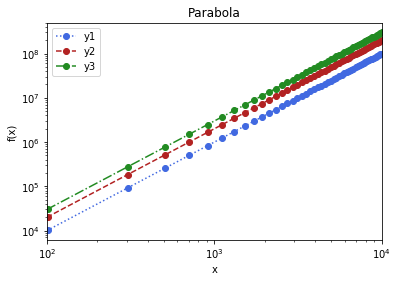

In [9]:
plt.plot(x, y1, label='y1', c='royalblue', linestyle='dotted', marker='o')        
plt.plot(x, y2, label='y2', c='firebrick', linestyle='dashed', marker='o')        
plt.plot(x, y3, label='y3', c='forestgreen', linestyle='dashdot', marker='o') 

plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(100,10000)

plt.legend()

plt.show()
plt.close()

***
## Scatter plots

The line plots we saw above are essentially scatter plots for which `matplotlib` has assumed that the function you gave it was continuous. Because there are so many datapoints in the arrays we used to define the above function, it looks totally smooth. However, if we use fewer data points, it will be obvious that it's not. For example, let's recreate our parabolas from above, this time using only a handful of points.

In [10]:
x = np.linspace(-1000,1000,5)
y1 = x**2
y2 = 2*x**2
y3 = 3*x**2

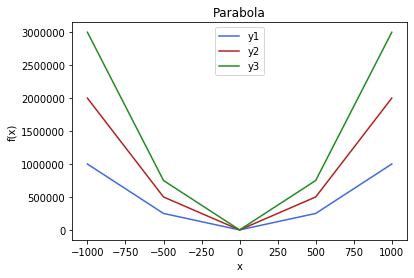

In [11]:
plt.plot(x, y1, label='y1', c='royalblue')        
plt.plot(x, y2, label='y2', c='firebrick')        
plt.plot(x, y3, label='y3', c='forestgreen')     
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

Now it's clear to see that these functions are not quite continuous. Sometimes, using a line plot like this is still fine, if you know that the trends in between your points are fairly linear (e.g. if you're plotting the function $x^2$); other times, you're going to want to see the data on its own. In order to do this, we need a scatter plot, which we can get by using `plt.scatter()` to plot our functions instead of `plt.plot()`. Let's try this with a sine function.

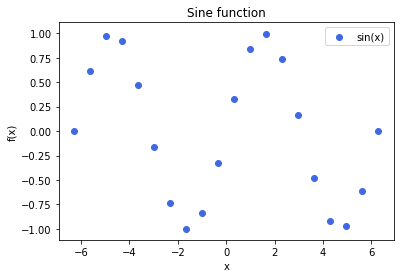

In [12]:
x = np.linspace(-2*np.pi, 2*np.pi, 20)
y = np.sin(x)

plt.scatter(x, y, label='sin(x)', c='royalblue')         
plt.title("Sine function")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

Great, now we just have the individual datapoints. As you can see, the `label` and `c` arguments are still totally fine here, as are the rest of the plotting commands. All we've changed is how the data is presented. Similar to the `linestyle` argument we saw before, scatter plots have a `marker` argument that lets you change the shape of the datapoints. [There are tons of marker shapes](https://matplotlib.org/stable/api/markers_api.html), but we'll go with stars (`marker='*'`) to demonstrate. You can also change the size of markers with `s` (for size).

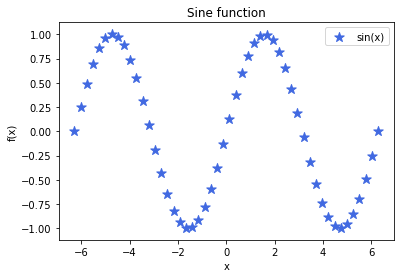

In [13]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

plt.scatter(x, y, label='sin(x)', c='royalblue', marker='*', s=100)         
plt.title("Sine function")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

While I realize I just said that sometimes you just want to see the data, it's often the case that connecting your data points is helpful. For this, we can just add back the `linestyle` argument, which tells `scatter()` to do so.

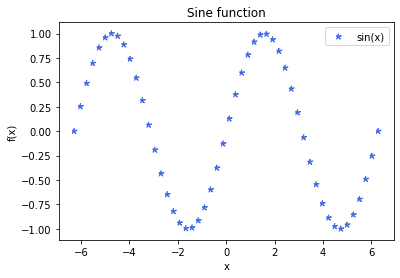

In [14]:
plt.scatter(x, y, label='sin(x)', c='royalblue', marker='*', linestyle='--')         
plt.title("Sine function")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

In astronomical data, points on a scatter plot often represent a single source (e.g. its position on an HR diagram). If we want to highlight this source among many, we can plot just the one point separately from the rest, and give it its own special color and shape and label. To do this, we first plot our scatter plot like normal, then add another scatter plot where the only point is the one you're interested in. Let's demonstrate this by highlighting the point where the sine function passes through (0,0).

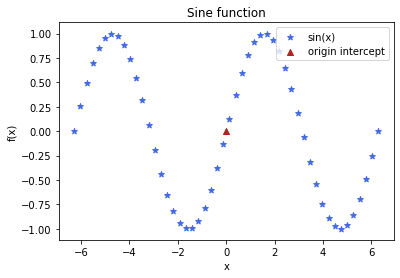

In [15]:
plt.scatter(x, y, label='sin(x)', c='royalblue', marker='*')
plt.scatter(0,0,label='origin intercept', c='firebrick', marker='^')
plt.title("Sine function")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.legend()
plt.show()
plt.close()

In fact, if you wanted to print them all in different colors for some reason, you could plot each point one-at-a-time in a for loop, which would randomize the colors for you. Just for fun, let's try it.

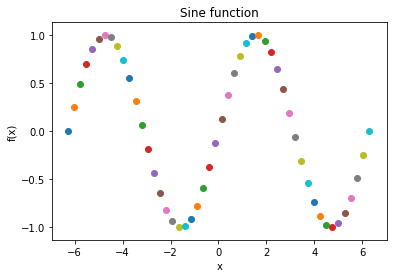

In [16]:
for x,y in zip(x,y):
    plt.scatter(x,y)
    
plt.title("Sine function")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.show()
plt.close()

***
## Error plots

Sometimes, your data is going to have uncertainty, and the way to represent that uncertainty in a plot is with errorbars. Errorbar plots allow you to add, well, errorbars to each of your datapoints.

In order to plot errorbars, you of course need errors, so let's make some arrays to represent those. 

In [17]:
x = np.linspace(0,100,20)  # Data
y = 3*x + 6                # Data

dy_sym = np.zeros(20)+10                            # Symmetric errors
dy_asym = [np.zeros(20)+15, np.linspace(0,100,20)]  # Asymmetric errors

In the cell above, I've defined some random data (a line), as well as two ways of representing error, `dy_sym` and `dy_asym`. In the case of `dy_sym`, the errors are `symmetric` for each point, meaning that the error in the positive direction is the same as in the negative direction (i.e. $H_0 = 7.21 $\pm$ 2.0).

### Symmetric errors

Symmetric errors are given by a single list, where the value at a given index corresponds to the errorbar height of the value of that same index in the data. That means that the length of **your list of errors has to be the same as your list of datapoints**, or else they won't be able to match up properly and you'll get an error.

In order to make an errorbar plot, simply use `plt.errorbar()` instead of `plt.plot()` or `plt.scatter()`, and to add your errors, add the argument `yerr=<array>` or `xerr=<array>`.

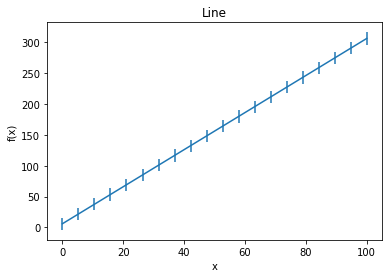

In [18]:
plt.errorbar(x, y, yerr=dy_sym)
plt.title("Line")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.show()
plt.close()

Because all the values in our symmetric error list `dy_sym` are 10s, we should have errorbars extending 10 units on each of our datapoints. Because we used `yerr`, our error is in the y-direction. If we wanted to add errors in the x-direction, we could include the `xerr` argument as well.

### Asymmetric errors

Let's add the asymmetric errors `dy_asym` as our x-axis errors.

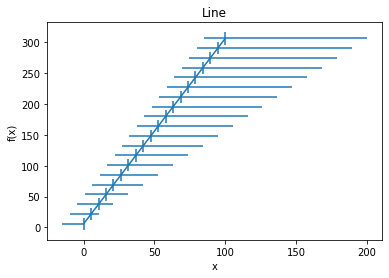

In [19]:
plt.errorbar(x, y, yerr=dy_sym, xerr=dy_asym)
plt.title("Line")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.show()
plt.close()

Unlike `dy_sym`, which was just one array, `dy_asym` is two arrays inside a list: the first array represents the lower/left errorbars, while the second represents the upper/right ones. Using this style of error definition, we can have points that have different size errorbars on either side of them. So, you can see now that we've added our asymmetric errors in the x-direction, the righthand errors come from the first array (all 15s) and the lefthand errors come from the second array (20 values between 1 and 100).

### Plot type / styling

The errorbar plot automatically makes itself look like a line plot, with tiny/no markers and connected points. However, if we want it to look more like a scatter plot, we can change the `linestyle` argument to the empty string (`''`), and change the `marker` argument to whatever we want. Also, to reiterate, you can use any of the color/line/marker customization options we talked about before here.

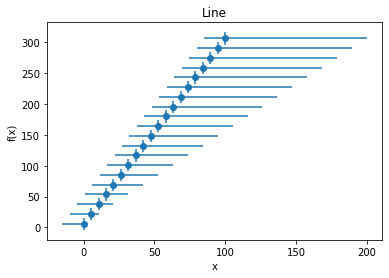

In [20]:
plt.errorbar(x, y, yerr=dy_sym, xerr=dy_asym, linestyle='', marker='o')
plt.title("Line")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.show()
plt.close()

The errorbars, like the datapoints themselves, have their own customization options separate from the rest of the plot. You can change the color of the errorbars with the `ecolor` argument, the width with `elinewidth`, and even add caps with `capsize`. Let's make the errors on our plot above red, add caps, and thin out the lines a bit.

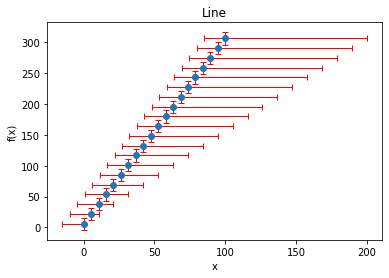

In [21]:
plt.errorbar(x, y, yerr=dy_sym, xerr=dy_asym, linestyle='', marker='o', ecolor='red', capsize=3, elinewidth=1)
plt.title("Line")
plt.xlabel("x")
plt.ylabel('f(x)')
plt.show()
plt.close()

Honestly, that looks a little better. 

***
## Histograms

Histograms are their own thing in `matplotlib`. No lines, no markers, just bars. You'll often find them useful for studying populations of things, i.e. "how many of $x$ things are there in $y$ category?"

Let's create a bunch of random numbers and then make a histogram with `plt.hist()` to see how many of each we get.

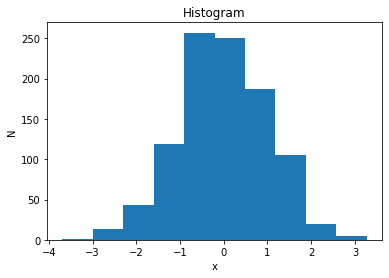

In [22]:
data = np.random.randn(1000) # This is a numpy function that creates a random normal distribution

plt.hist(data)
plt.title("Histogram")
plt.xlabel("x")
plt.ylabel('N')
plt.show()
plt.close()

So we've got a normal distribution. Now, `matplotlib` automatically _binned_ the data into the 10 bars we see here. _Binning_ is essentially just the process of placing many datapoints into a single category; sometimes this is useful (i.e. with noisy data in line/scatter plots), but sometimes it can remove important features. If we want more finely binned data, we can add the `bins` argument to `hist()`, specifying the number of bins (bars) we want in our histogram.

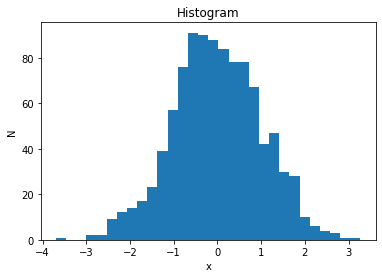

In [23]:
plt.hist(data, bins=30)
plt.title("Histogram")
plt.xlabel("x")
plt.ylabel('N')
plt.show()
plt.close()

If you want to put more than one histogram on the same plot, it might be hard to see what's going on in the overlap. For this, we can change the `alpha` value fo the histogram, which just makes it semi-transparent on a scale of 0 (invisible) to 1 (opaque).

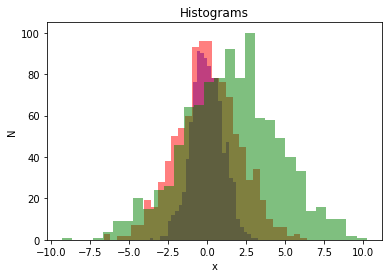

In [24]:
data2 = np.random.normal(0,2,1000)
data3 = np.random.normal(1.5,3,1000)

plt.hist(data, bins=30, alpha=0.5, color='blue')
plt.hist(data2, bins=30, alpha=0.5, color='red')
plt.hist(data3, bins=30, alpha=0.5, color='green')
plt.title("Histograms")
plt.xlabel("x")
plt.ylabel('N')
plt.show()
plt.close()